In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [6]:
df = pd.read_csv('/home/jade/Downloads/Project AQP/Data/Real-Data/Real_Combine.csv')

In [7]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [8]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [9]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [12]:
X = df.drop(columns=['PM 2.5'])
y = df['PM 2.5']

In [13]:
print(X)
print(y)

        T    TM    Tm     SLP     H   VV     V    VM
0     7.4   9.8   4.8  1017.6  93.0  0.5   4.3   9.4
1     7.8  12.7   4.4  1018.5  87.0  0.6   4.4  11.1
2     6.7  13.4   2.4  1019.4  82.0  0.6   4.8  11.1
3     8.6  15.5   3.3  1018.7  72.0  0.8   8.1  20.6
4    12.4  20.9   4.4  1017.3  61.0  1.3   8.7  22.2
..    ...   ...   ...     ...   ...  ...   ...   ...
726  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9
727  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2
728  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8
729  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5
730  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3

[731 rows x 8 columns]
0      219.720833
1      182.187500
2      154.037500
3      223.208333
4      200.645833
          ...    
726    288.416667
727    256.833333
728    169.000000
729    186.041667
730    185.583333
Name: PM 2.5, Length: 731, dtype: float64


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**RandomForest Regression Algorithm**

In [16]:
rf = RandomForestRegressor(random_state=42)

In [17]:
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [18]:
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [19]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; tot

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [20]:
best_rf = grid_rf.best_estimator_

In [21]:
y_pred_rf = best_rf.predict(X_test)

In [22]:
from sklearn.metrics import r2_score

In [23]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

In [24]:
mse_rf, mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

In [52]:
print(f"Random Forest - Mean Square Error      : {mse_rf})")
print(f"Random Forest - Mean Absolute Error    : {mae_rf}")
print(f"Random Forest - Root Mean Square Error : {rmse_rf}")
print(f"Random Forest - R^2                    : {r2_rf}")

Random Forest - Mean Square Error      : 2625.6033159179215)
Random Forest - Mean Absolute Error    : 37.22671018945427
Random Forest - Root Mean Square Error : 51.24064125201715
Random Forest - R^2                    : 0.602933587425678


**Suport Vector Machine Regression Algorithm**

In [26]:
svr = SVR()

In [27]:
param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

In [28]:
grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [29]:
grid_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_squared_error')

In [30]:
best_svr = grid_svr.best_estimator_

In [31]:
y_pred_svr = best_svr.predict(X_test)

In [32]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

In [33]:
mse_svr, mae_svr, rmse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)

In [54]:
print(f"SVR - Mean Square Error      : {mse_svr})")
print(f"SVR - Mean Absolute Error    : {mae_svr}")
print(f"SVR - Root Mean Square Error : {rmse_svr}")
print(f"SVR - R^2                    : {r2_svr}")

SVR - Mean Square Error      : 2893.409889310988)
SVR - Mean Absolute Error    : 36.541496940405366
SVR - Root Mean Square Error : 53.79042562864685
SVR - R^2                    : 0.5624335641676593


**XGB Regression Algorithm**

In [35]:
xgb = XGBRegressor(random_state=42)

In [36]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [37]:
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [38]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [39]:
best_xgb = grid_xgb.best_estimator_

In [40]:
y_pred_xgb = best_xgb.predict(X_test)

In [41]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

In [42]:
mse_xgb, mae_xgb, rmse_xgb,r2_xgb = evaluate_model(y_test, y_pred_xgb)

In [56]:
print(f"XGBoost - Mean Square Error      : {mse_xgb})")
print(f"XGBoost - Mean Absolute Error    : {mae_xgb}")
print(f"XGBoost - Root Mean Square Error : {rmse_xgb}")
print(f"XGBoost - R^2                    : {r2_xgb}")

XGBoost - Mean Square Error      : 2672.080815493013)
XGBoost - Mean Absolute Error    : 36.75292787616756
XGBoost - Root Mean Square Error : 51.69217363869518
XGBoost - R^2                    : 0.5959048584818107


In [44]:
final_model = best_rf
with open('air_quality_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [62]:
print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf},  RMSE: {rmse_rf}, R^2: {r2_rf}")
print(f"SVR           - MSE: {mse_svr},  MAE: {mae_svr}, RMSE: {rmse_svr}, R^2: {r2_svr}")
print(f"XGBoost       - MSE: {mse_xgb},  MAE: {mae_xgb},  RMSE: {rmse_xgb}, R^2: {r2_xgb}")

Random Forest - MSE: 2625.6033159179215, MAE: 37.22671018945427,  RMSE: 51.24064125201715, R^2: 0.602933587425678
SVR           - MSE: 2893.409889310988,  MAE: 36.541496940405366, RMSE: 53.79042562864685, R^2: 0.5624335641676593
XGBoost       - MSE: 2672.080815493013,  MAE: 36.75292787616756,  RMSE: 51.69217363869518, R^2: 0.5959048584818107


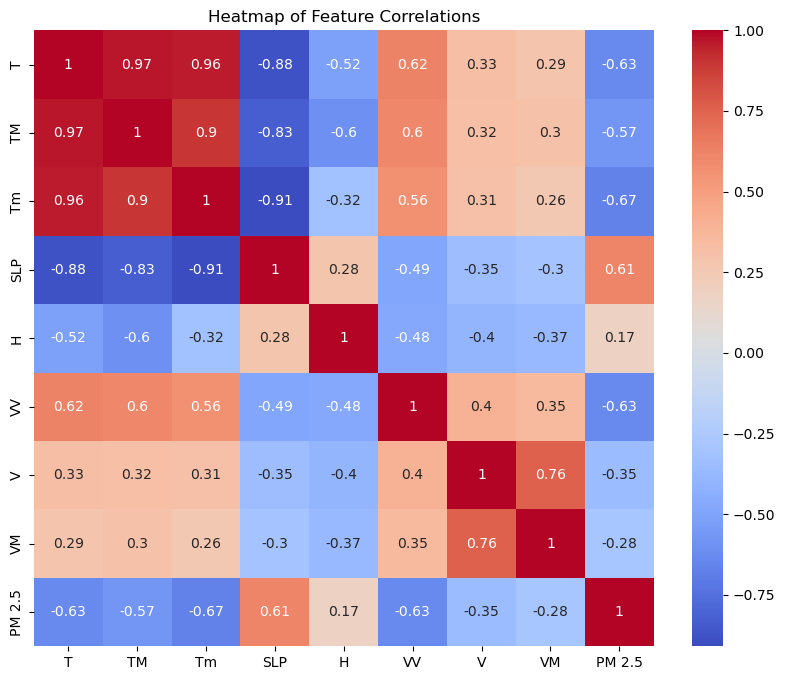

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

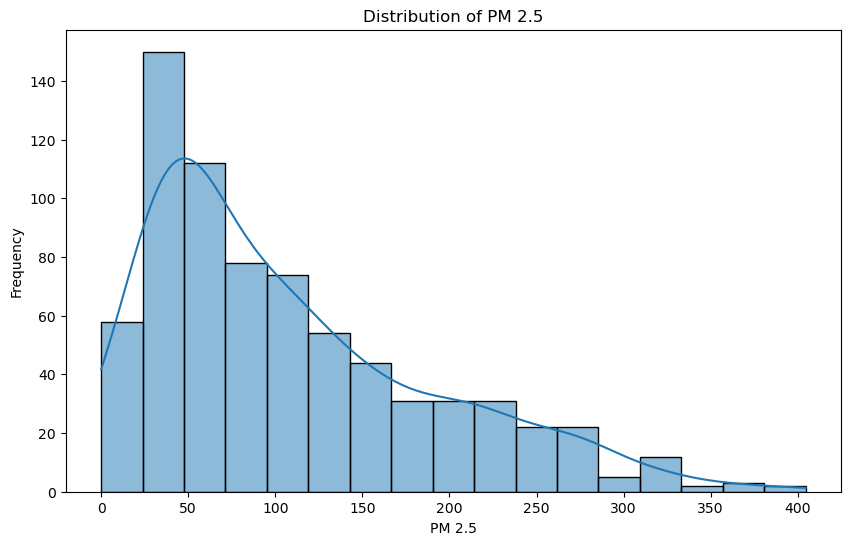

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['PM 2.5'], kde=True)
plt.title('Distribution of PM 2.5')
plt.xlabel('PM 2.5')
plt.ylabel('Frequency')
plt.show()

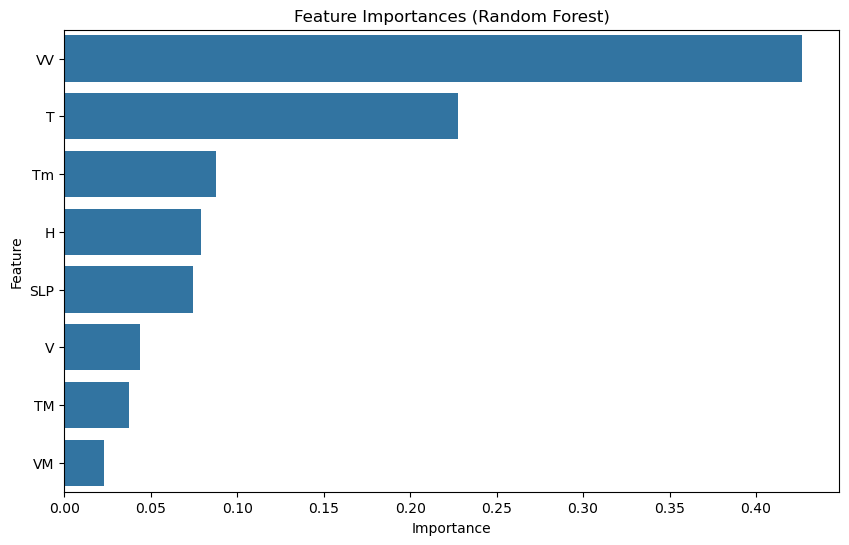

In [48]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

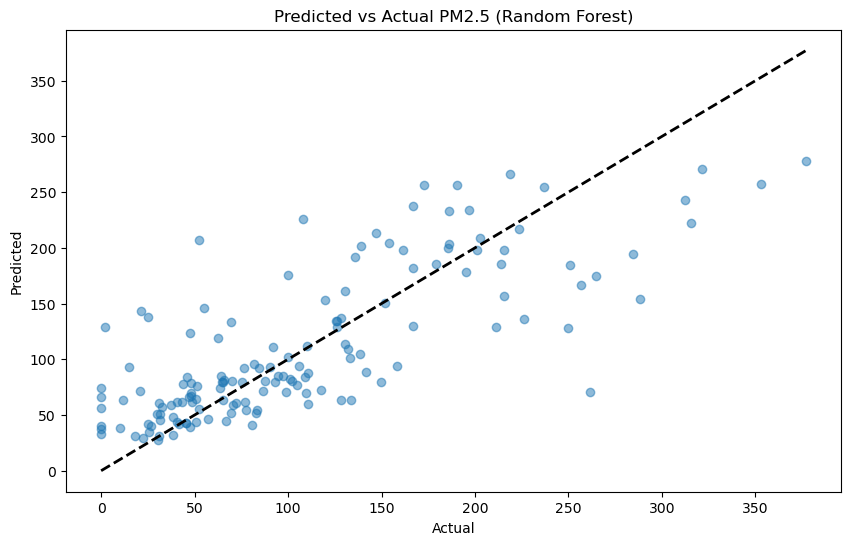

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual PM2.5 (Random Forest)')
plt.show()

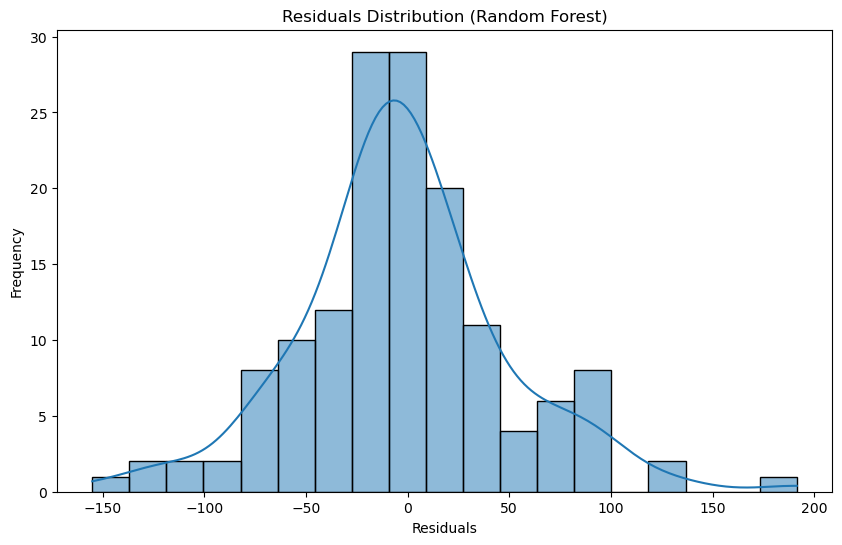

[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.7s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.1s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.6s
[CV] END bootstrap=False, max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   2.2s
[CV] END bootstrap=False, max_depth=50, min_sample

In [50]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()